***Step 1: Install and Import Dependencies***

In [1]:
# Install PyTorch (if needed)
!pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

***Step 2: Generate Sample Data***

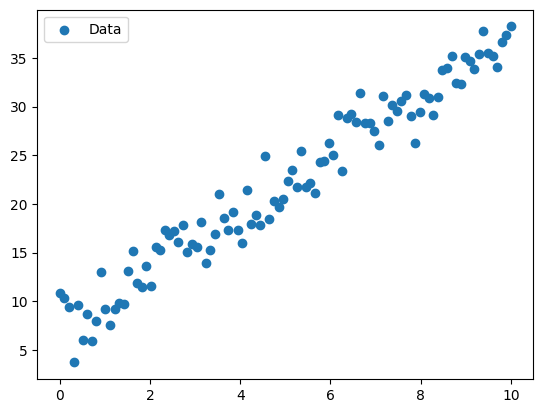

In [2]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * X + 7 + torch.randn(X.size()) * 2  # y = 3x + 7 with noise

plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.legend()
plt.show()

***Step 3: Define a Simple Linear Model***

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel().to(device)

***Step 4: Define Loss and Optimizer***

In [4]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

***Step 5: Train the Model***

In [5]:
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    predictions = model(X.to(device))
    loss = criterion(predictions, y.to(device))

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 50/500, Loss: 12.5340
Epoch 100/500, Loss: 9.1302
Epoch 150/500, Loss: 7.0608
Epoch 200/500, Loss: 5.8027
Epoch 250/500, Loss: 5.0378
Epoch 300/500, Loss: 4.5728
Epoch 350/500, Loss: 4.2901
Epoch 400/500, Loss: 4.1182
Epoch 450/500, Loss: 4.0137
Epoch 500/500, Loss: 3.9501


***Step 6: Visualize the Results***

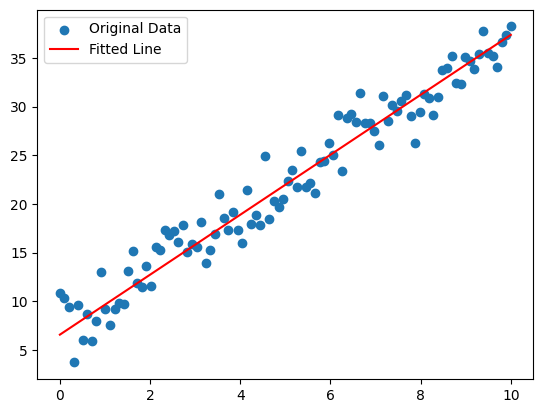

In [6]:
# Plot trained model with data
model.eval()
predictions = model(X.to(device)).detach().cpu().numpy()
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), predictions, color='red', label='Fitted Line')
plt.legend()
plt.show()